ETL & Data Analysis for Wine Data SET 

In [5]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Extraction
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine_data = pd.read_csv(wine_url, header=None)

wine_quality_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_quality_data = pd.read_csv(wine_quality_url, sep=";")

# Initial look at the data
print(wine_data.head())
print(wine_quality_data.head())


   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9

In [7]:
# Transformation
# Assigning  column names
wine_data.columns = ['class', 'alcohol', 'malic acid', 'ash',
                     'alcalinity of ash', 'magnesium', 'total phenols',
                     'flavonoids', 'nonflavonoid phenols', 'proanthocyanidins',
                     'color intensity', 'hue', 'OD280/OD315 of diluted wines',
                     'proline']

# Converting Class column into categorical datatype
wine_data['class'] = wine_data['class'].astype('category')

# Checking for any missing values in both datasets
print(wine_data.isnull().sum())
print(wine_quality_data.isnull().sum())



class                           0
alcohol                         0
malic acid                      0
ash                             0
alcalinity of ash               0
magnesium                       0
total phenols                   0
flavonoids                      0
nonflavonoid phenols            0
proanthocyanidins               0
color intensity                 0
hue                             0
OD280/OD315 of diluted wines    0
proline                         0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [34]:
# Normalizing 'alcohol' column in the wine_data using Min-Max normalization
wine_data['alcohol'] = (wine_data['alcohol'] - wine_data['alcohol'].min()) / (wine_data['alcohol'].max() - wine_data['alcohol'].min())

# Creating an average quality column in wine_quality_data
wine_quality_data['average_quality'] = wine_quality_data[['fixed acidity', 'volatile acidity', 'citric acid',
                                                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                                                          'total sulfur dioxide', 'density', 'pH', 'sulphates',
                                                          'alcohol']].mean(axis = 1)

# Creating a 'quality_label' column based on 'average_quality'
wine_quality_data['quality_label'] = pd.cut(wine_quality_data['average_quality'], bins=[0, 5, 7, np.inf], 
                                            labels = ['low', 'medium', 'high'])


In [35]:
wine_quality_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,average_quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,6.322164,medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,10.732255,high
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,8.609000,high
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,9.595727,high
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,6.322164,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,9.135900,high
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,10.480647,high
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,8.589249,high
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,9.110497,high


In [39]:
print (wine_quality_data.iloc[:,-2:])

      average_quality quality_label
0            6.322164        medium
1           10.732255          high
2            8.609000          high
3            9.595727          high
4            6.322164        medium
...               ...           ...
1594         9.135900          high
1595        10.480647          high
1596         8.589249          high
1597         9.110497          high
1598         7.862954          high

[1599 rows x 2 columns]


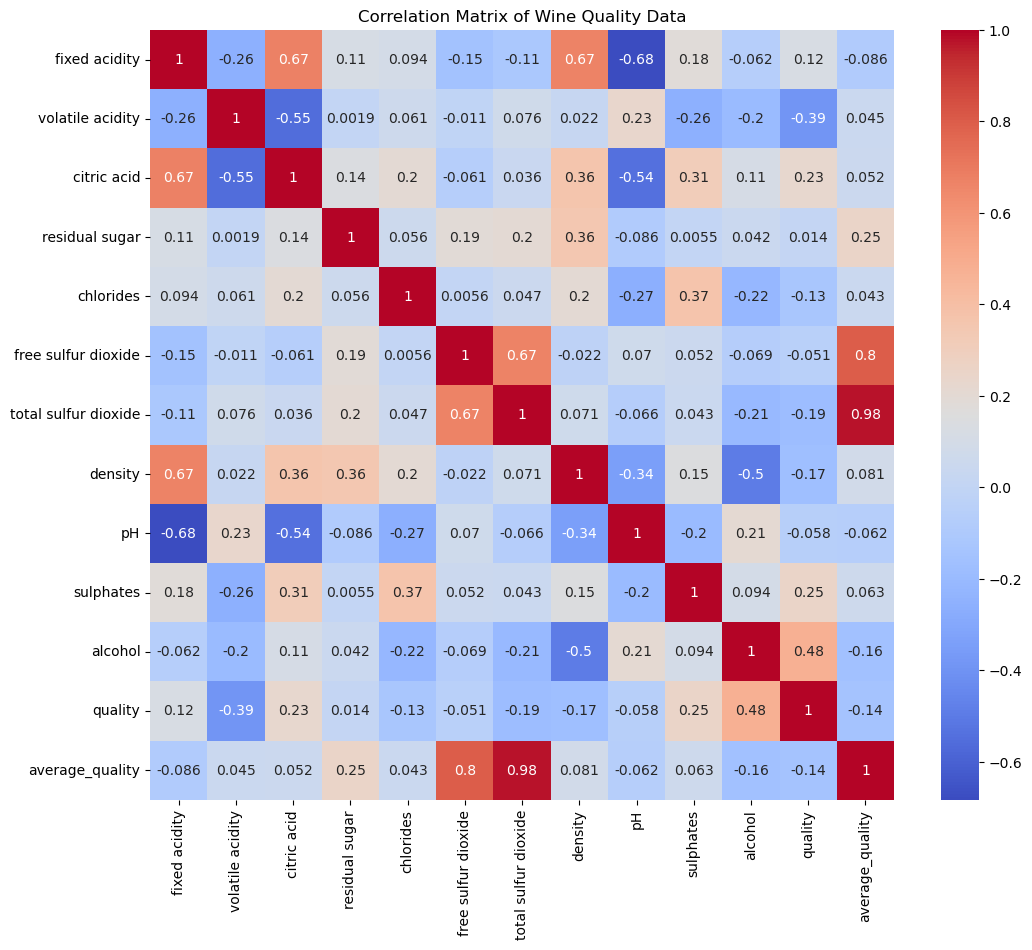

In [40]:
# Correlation Matrix
corr = wine_quality_data.corr(numeric_only = True)

# Plot heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Wine Quality Data')

# Save the figure
plt.savefig('correlation_matrix.png', dpi = 300, bbox_inches = 'tight')

plt.show()

columns have high effect in average quality : total sulfur dioxide , free sulfur dioxide 
fixed acidity afffect density &

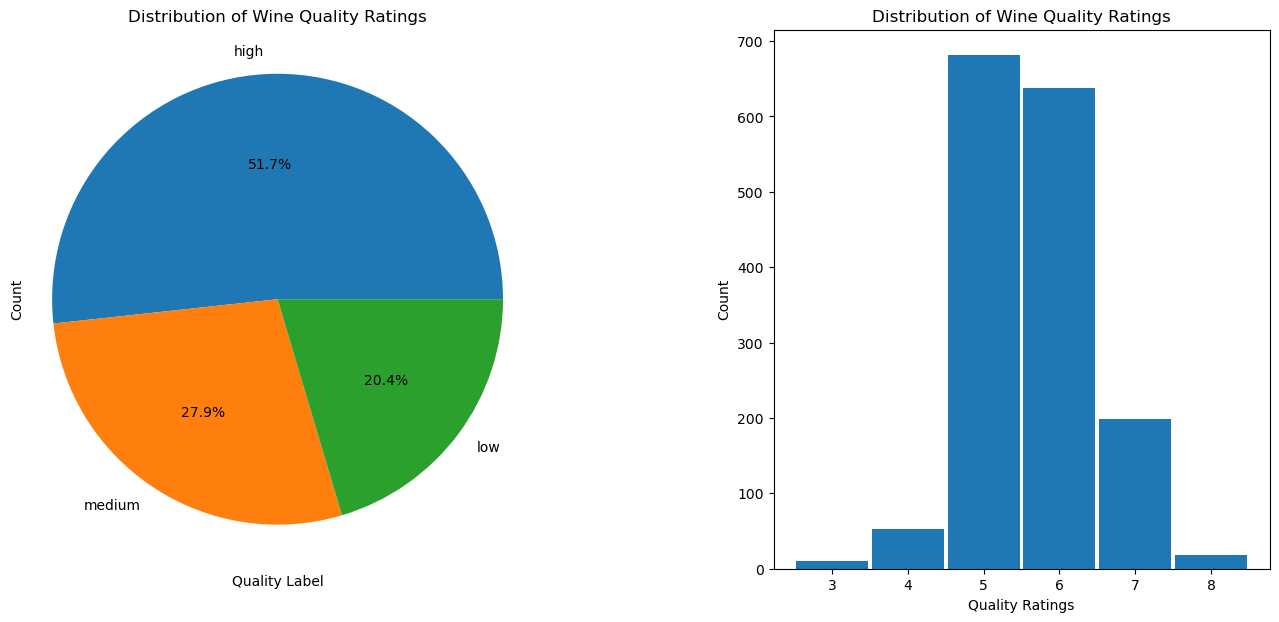

In [46]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot the pie chart
quality_counts = wine_quality_data['quality_label'].value_counts()
ax1.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%')
ax1.set_title('Distribution of Wine Quality Ratings')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is circular.
ax1.set_xlabel('Quality Label')
ax1.set_ylabel('Count')

# Plot the histogram
ax2.hist(wine_quality_data['quality'], bins=np.arange(2.5, 9), rwidth=0.95)
ax2.set_title('Distribution of Wine Quality Ratings')
ax2.set_xlabel('Quality Ratings')
ax2.set_ylabel('Count')
ax2.set_xticks(np.arange(3, 9, step=1))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Save the figure
# plt.savefig('wine_quality_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

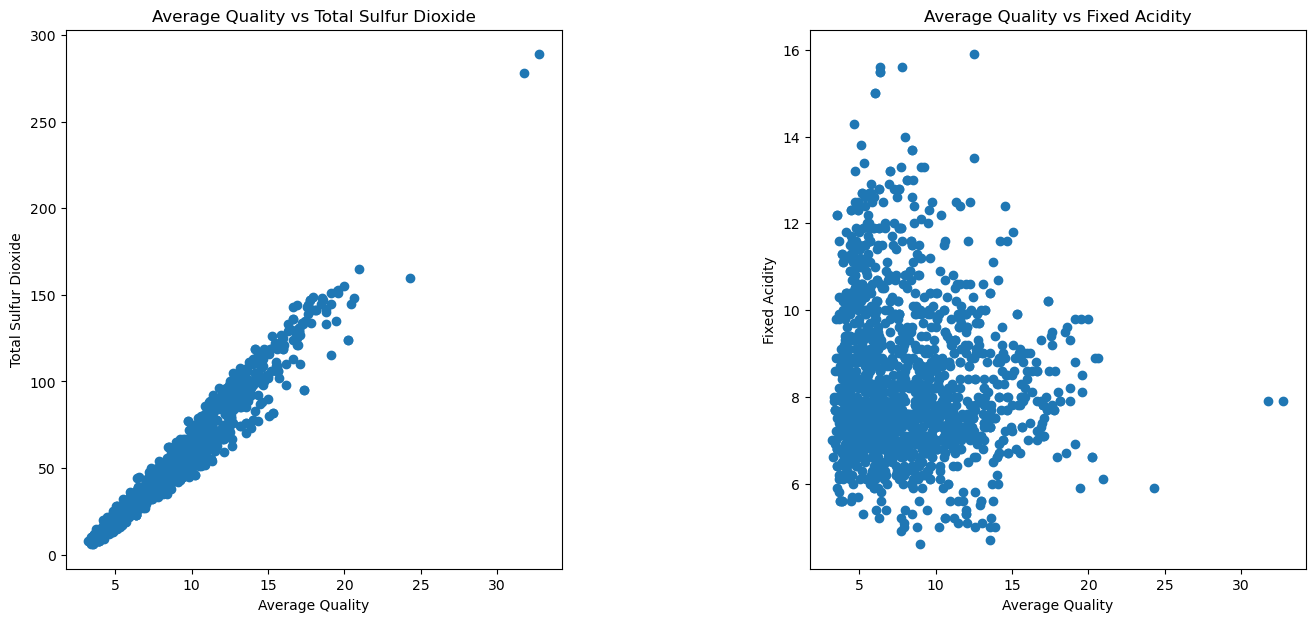

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot the scatter plot
ax1.scatter(wine_quality_data['average_quality'], wine_quality_data['total sulfur dioxide'])
ax1.set_title('Average Quality vs Total Sulfur Dioxide')
ax1.set_xlabel('Average Quality')
ax1.set_ylabel('Total Sulfur Dioxide')

# Plot the scatter plot
ax2.scatter(wine_quality_data['average_quality'], wine_quality_data['fixed acidity'])
ax2.set_title('Average Quality vs Fixed Acidity')
ax2.set_xlabel('Average Quality')
ax2.set_ylabel('Fixed Acidity')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Save the figure
plt.savefig('wine_quality_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
# Loading
# Saving the transformed data as a csv file
wine_data.to_csv('wine_dataset.csv', index = False)
wine_quality_data.to_csv('wine_quality_dataset.csv', index = False) 

In [51]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///database.db', echo=False)

In [53]:
wine_data.to_sql('wine_data', con=engine, if_exists='replace', index=False)
# print(wine_data.isnull().sum())
# print(wine_quality_data.isnull().sum())


178

In [ ]:
# The last and critical step is encapsulating the entire ETL process into a function for reusability:
# def etl_pipeline(csv_file, db_file, table_name):
#     from sqlalchemy import create_engine
#     import pandas as pd

In [ ]:
#    # Extract
#     data = pd.read_csv(csv_file)    # Transform
#     transformed_data = data.fillna(0)    # Load
#     engine = create_engine(f'sqlite:///{db_file}', echo=False)
#     transformed_data.to_sql(table_name, con=engine, if_exists='replace', index=False)    # Confirm successful load by querying data
#     db_df = pd.read_sql_query(f"SELECT * FROM {table_name}", con=engine)
#     print(db_df.head())